In [1]:
import glob
from tabulate import tabulate
from skimage import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
from CoolProp.CoolProp import PropsSI
from CoolProp.Plots import PropertyPlot
from pyXSteam.XSteam import XSteam
steamTable = XSteam(XSteam.UNIT_SYSTEM_MKS)

### Ciclo Brayton c/ ciclo Rankine

Text(0.5, 1.0, 'Diagrama T-s')

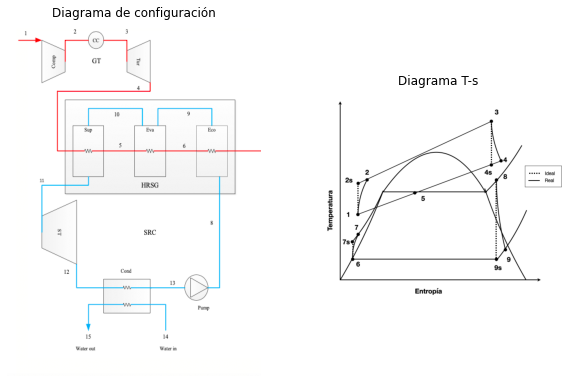

In [2]:
image1=io.imread("../fig/BraRa.png")/255.0
image2=io.imread("../fig/BrR.png")/255.0
fig = plt.figure(figsize=(10, 7)) 
fig.add_subplot(1, 2, 1) 
plt.imshow(image1,vmin=0,vmax=1) 
plt.axis('off') 
plt.title("Diagrama de configuración") 
fig.add_subplot(1, 2, 2) 
plt.imshow(image2,vmin=0,vmax=1) 
plt.axis('off') 
plt.title("Diagrama T-s") 


### Ciclo Brayton

In [3]:
FMc = 500 #kg/s
Eta_Comp = 0.85 
rp = 12
PD_cc = 0.04
Eta_cc = 0.95
Eta_gt = 0.88
TIT = 900
TITk = 900+273.15
T_P3 = TITk
LHV = 49482*100
T_P1 = 20+273.15
P1 = 1.013
P4 = P1
lamdaa = 1.4
lamdagc = 1.3
U = 0.2870
Fluid1 = 'Aire'
Fluid2 = 'Metano'

### Datos para estado muerto

In [4]:
Ho = 317.17
So = 1.4088
Po = 1.013
To = 273.15+20

##### Punto 1 y 2

In [5]:
T_P2 = (T_P1 * (1+(1/Eta_Comp)*(((rp)**((lamdaa -1)/lamdaa))-1)))
P2 = P1 * rp
T_P12 = (T_P1+T_P2)/2
CpaT1 = 1.04841-((3.83719*T_P1)/(10**4))+((9.45378*T_P1**2)/(10**7))-((5.49031*T_P1**3)/(10**10))+((7.92981*T_P1**4)/(10**14))
CpaT2 = 1.04841-((3.83719*T_P2)/(10**4))+((9.45378*T_P2**2)/(10**7))-((5.49031*T_P2**3)/(10**10))+((7.92981*T_P2**4)/(10**14))
w_comp2 = ((CpaT2*T_P2)-(CpaT1*T_P1))
W_comp2 = FMc * w_comp2
p1 = CpaT2*To
p2 = ((T_P2/To)-1)
p3 = np.log10(T_P2/To)
p4 = (lamdaa -1) /lamdaa
p5 = (((np.log10(P2/P1))+((T_P2/To)*((Po/P2)-1))))
EX2 = p1*(p2 - p3 + (p4*p5))
ex2 = CpaT2*To*(((T_P2/To)-1)-np.log10(T_P2/To)+(((lamdaa -1) /lamdaa)*(((np.log10(P2/P1))+((T_P2/To)*((Po/P2)-1))))))
EX2,ex2,W_comp2,w_comp2

(186.31251083950715, 186.31251083950715, 197772.9281369888, 395.5458562739776)

##### Punto 3 y 4

In [6]:
CpgT3 = 0.991615 - ( (6.99703*TIT)/(10**5) ) + ( (2.71298*(TIT**2))/(10**7) ) - ( (1.22442*(TIT**3))/(10**10) )
CpgT2 = 0.991615 - ( (6.99703*T_P2)/(10**5) ) + ( (2.71298*(T_P2**2))/(10**7) ) - ( (1.22442*(T_P2**3))/(10**10) )
FMf = FMc *(((CpgT3*T_P3) - (CpgT2*T_P2))/((Eta_Comp*LHV)-(CpgT3*T_P3)))
Q_cc = Eta_cc*FMc*(LHV)
Q_comp = FMf * Eta_Comp * LHV
FM3 = FMc + FMf
FM4 = FM3
P3 = P2*(1-PD_cc)
T_P4 = T_P3*(1-(Eta_gt*(1-((P3/P4)**((1-lamdagc)/lamdagc)))))
CpgT4 = 0.991615 - ( (6.99703*T_P4)/(10**5) ) + ( (2.71298*(T_P4**2))/(10**7) ) - ( (1.22442*(T_P4**3))/(10**10) )
W_turb = FM3*((CpgT3*T_P3)-(CpgT4*T_P4))

##### Entalpías 1:4

In [7]:
H1 = CpaT1*T_P1
H2 = CpaT2*T_P2
H3 = CpgT3*T_P3
H4 = CpgT4*T_P4
H1,H2,H3,H4
s1 = (CP.PropsSI('S','T',T_P1,'P',P1*101350,'air'))/1000

In [8]:
S3 =(CP.PropsSI('S','T',T_P3,'P',P3,'methane'))
#ex3 = FM3 *((H3-Ho)-To*(S3-So))
S4 = CP.PropsSI('S','T',T_P4,'P',101350*P4,'methane')
ex4 = ((FMc *(H4-Ho))-To*(S4-So))/1000
S2=(CP.PropsSI('S','P',10135*P2,'H',H2,'air'))
Ex2 = (500*((H2-Ho)-(To*(S2/1000-So))))
Ex1 = FMc *(((H1-Ho))-To*(s1/1000-So))
Ex3 = (H3-Ho-(((S3/1000)-So)*To))*FMc
Ex4 = To*(S4-So)
H3 =(CP.PropsSI('H','T',T_P3,'P',P3,'methane'))
tesoro = (500*((H2-Ho)-(To*(S2/1000-So))))
tesoro,Ex2

(391599.95796709904, 391599.95796709904)

In [9]:
T6 = 305.70
Ex3

-1673064.2101589008

In [10]:
Pt1 = Fluid1,T_P1-273.15,P1,H1,s1/1000,FMc,Ex1
Pt2 = Fluid1,T_P2-273.15,P2,H2,S2/1000,FMc,Ex2
Pt3 = Fluid2,T_P3-273.15,P3,H3,S3/1000,FM3,Ex3
Pt4 = Fluid2,T_P4-273.15,P4,H4,S4/1000,FM4,Ex4

### Datos Rankine

In [11]:
P12 = 0.1
P11 = 80
T11 = 430
Eta_tur = 0.85
Eta_pump = 0.8
P14 = 1.01
P15 = P14
Fluid3 = 'Agua'

##### Punto 10

In [12]:
P10=P11
T10 = (steamTable.tsat_p(P11))
H10 = (steamTable.hV_p(P11))
S10 = (steamTable.sV_p(P11))
ex10 = 50.88 *(((H10-Ho))-To*(S10-So))


##### Punto 9

In [13]:
T9 = T10 - 10
P9 = P11
H9 = (steamTable.h_pt(P9,T9))
S9 = (steamTable.s_pt(P9,T9))


##### Punto 11

In [14]:
H11 = (steamTable.h_pt(P11,T11))
S11 = (steamTable.s_pt(P11,T11))/1000
ex11 = 50.88 *(((H11-Ho))-To*(S11-So))


##### Punto 12

In [15]:
S12s = S11
H12s = (steamTable.h_ps(P12,S12s))
WITurbina = H11 - H12s
H12 = H11 - (Eta_tur*WITurbina)
S12 = (steamTable.s_ph(P12,H12))/1000
T12 = (steamTable.t_ps(P12,S12))
ex12 = 50.88*((H12-Ho)-To*(S12-So))
x12 = (steamTable.x_ph(P12,H12))
Por = 1-x12
FM = FM3*0.1
Fm2 = FM*x12

##### Punto 13

In [16]:
H13 = (steamTable.hL_p(P12))
v13 = (steamTable.vL_p(P12))
S13 = (steamTable.sL_p(P12))
T13 = (steamTable.tsat_p(P12))
P13 = P12
ex13 = (50.88*(((Ho-H13))-To*(So-S13)))/1000

##### Punto 8

In [17]:
S8s = S13
H8s = (steamTable.h_ps(P11,S8s))
H8 = H13+((H8s-H13)/Eta_pump)
S8 = (steamTable.s_ph(P11,H8))
P8 = (steamTable.p_hs(H8,S8))
T8 = (steamTable.t_ps(P8,S8))

##### Punto 6

In [18]:
T4 = T_P4 
T_6 = T6 + 273.15
Ms = (FM3 *CpgT4*(T4-T_6))/(H11-H9)
P5 = P4
P6 = P5
CpaT6 = (CP.PropsSI('C','T',T_6,'P',P6*101350,'methane'))
H6 = (CpaT6*T_6)/1000
S6 = (CP.PropsSI('S','P',T_6,'H',H6*1000,'methane'))

##### Punto 5

In [19]:
T5 = T4 - (Ms*(H11-H10))/(FM3*CpgT4)
CpaT5 = (CP.PropsSI('C','T',T5,'P',P5*101350,'methane'))
H5 = (CpaT5*T5)/1000
S5 = (CP.PropsSI('S','P',T5,'H',H5*1000,'methane'))

##### Punto 7

In [20]:
P7 = P6
T7 = T_6 - (Ms*(H9-H8))/(FM3*CpgT4)
CpaT7 = (CP.PropsSI('C','T',T7,'P',P7*101350,'methane'))
H7 = (CpaT7*T7)/1000
S7 = (CP.PropsSI('S','P',T7,'H',H7*1000,'methane'))

In [21]:
Ex5 = (FM3 *(((H5-Ho))-To*(S5/10000-So)))
Ex6 = (FM3 *((H6-Ho))-To*(S6/1000-So))
Ex7 = (FM3 *(((H7-Ho))-To*(S7/10000-So)))
Pt5 = Fluid2,T5-273.15,P5,H5,S5/1000,FM3,Ex5
Pt6 = Fluid2,T6,P6,H6,S6/1000,FM3,Ex6
Pt7 = Fluid2,T7,P7,H7,S7/1000,FM3,Ex7

In [22]:
Ex8 = (Ms *(((H8-Ho))-To*(S8-So)))
Ex9 = (Ms *((H9-Ho))-To*(S9-So))
Ex10 = (Ms *(((H10-Ho))-To*(S10-So)))
Ex11 = (Ms *(((H11-Ho))-To*(S11-So)))
Ex12 = (Ms *((H12-Ho))-To*(S12-So))
Ex13 = Ms *((((H13-Ho))-To*(S13-So)))

### Verificación

In [23]:
Wbomba = (v13*(P11-P12)*100)/Eta_pump
WTurbina = WITurbina * Ms
Q_HRSG = FM3 * CpgT4*(T4 - T7)
Qsup = FM3 * CpgT4 * (T4-T5)
Qeva = FM3 * CpgT4 * (T5-T_6)
Qeco = FM3 * CpgT4 * (T_6-T7)
Q = Ms * (H11-H8)
Qsal = Ms*(H7)
Turbinas =  W_turb-WTurbina
Brayton = W_turb - W_comp2
Rankine = WTurbina - Wbomba
Dif = Brayton + Rankine 
#Dif2 = Q_cc - Q_condensador-Qsal

##### Punto 14

In [24]:
T14 = 20+273.15
P14_s = P14 * 101300
H14 = (steamTable.h_pt(1.01,T14))/10
S14 = (steamTable.s_pt(1.01,T14))/1000


##### Punto 15

In [25]:
T15 = 30+273.15
H15 = (steamTable.h_pt(P15,T15))/10
S15 = (steamTable.s_pt(P15,T15))/1000


In [26]:
Q_condensador = Ms*(H12-H13)
FMcool = (Q_condensador/(H15-H14))
Ex14 = FMcool*((H14-Ho)-To*(S14-So))
Ex15 = FMcool*((H15-Ho)-To*(S15-So))

In [27]:
Pt8 = Fluid3,T8,P8,H8,S8,Ms,Ex8
Pt9 = Fluid3,T9,P9,H9,S9,Ms,Ex9
Pt10 = Fluid3,T10,P10,H10,S10,Ms,Ex10
Pt11 = Fluid3,T11,P11,H11,S11,Ms,Ex11
Pt12 = Fluid3,T12,P12,H12,S12,Ms,Ex12
Pt13 = Fluid3,T13,P13,H13,S13,Ms,Ex13
Pt14 = Fluid3,T14,P14,H14,S14,FMcool,Ex14
Pt15 = Fluid3,T15,P15,H15,S15,FMcool,Ex15

### Resultados

In [28]:
Resultados = [Pt1, Pt2, Pt3, Pt4,Pt5,Pt6,Pt7]
columnas = ['Fluido','T [ºC]','P [bar]','h [kJ/kg]','s[kJ/kgK]','Flujo másico [kg/s]','ex [kJ/kg]']
filas = [1,2,3,4,5,6,7]
df = pd.DataFrame(Resultados,columns = columnas, index = filas)
df

,Fluido,T [ºC],P [bar],h [kJ/kg],s[kJ/kgK],Flujo másico [kg/s],ex [kJ/kg]
1,Aire,20.000000,1.01300,2.942991e+02,0.003860,500.000000,1.944937e+05
2,Aire,376.586629,12.15600,6.898450e+02,0.008408,500.000000,3.916000e+05
3,Metano,900.000000,11.66976,4.131123e+06,15.979771,500.068397,-1.673064e+06
4,Metano,454.962680,1.01300,7.552227e+02,9.205192,500.068397,2.698089e+06
5,Metano,419.728981,1.01300,2.497133e+03,12.207691,500.068397,1.117695e+06
6,Metano,305.700000,1.01300,1.849586e+03,11.403348,500.068397,7.633828e+05
7,Metano,498.034082,1.01300,1.440913e+03,10.764054,500.068397,6.106756e+05


In [58]:
Resultados2 = [Pt8, Pt9, Pt10, Pt11, Pt12, Pt13, Pt14, Pt15]
columnas = ['Fluido','T [ºC]','P [bar]','h [kJ/kg]','s[kJ/kgK]','Flujo másico [kg/s]','Exergía']
filas = [8,9,10,11,12,13,14,15]
df2 = pd.DataFrame(Resultados2,columns = columnas, index = filas)
df2

,Fluido,T [ºC],P [bar],h [kJ/kg],s[kJ/kgK],Flujo másico [kg/s],Exergía
8,Agua,46.551675,79.931398,201.870116,0.655504,39.528304,4.171379e+03
9,Agua,285.009121,80.000000,1262.330871,3.110438,39.528304,3.686177e+04
10,Agua,295.009121,80.000000,2758.611081,5.744849,39.528304,4.626110e+04
11,Agua,430.000000,80.000000,3220.945183,0.006484,39.528304,1.310310e+05
12,Agua,0.108069,0.100000,484.647533,0.001567,39.528304,7.032633e+03
13,Agua,45.807548,0.100000,191.812295,0.649218,39.528304,3.846647e+03
14,Agua,293.150000,1.010000,306.074438,0.008188,5755.273868,2.299196e+06
15,Agua,303.150000,1.010000,308.085686,0.008224,5755.273868,2.310712e+06


### Cálculo termo económico

In [30]:
Z_C = (71.1*FMc*rp*np.log(rp))/(0.9-Eta_Comp)
Z_CCh = ((46.08*FMc)*(1+np.exp((0.018*T_P3)-26.4)))/(0.995-(P3/P2))
Z_TG = (((479.34*FMc)*np.log(P3/P4))*(1+np.exp(0.036*T_P3)-54.14))/(0.92-Eta_gt)
A_eco = Q_HRSG/(42.6*(T7-T_6/(np.log(T7/T_6))))
A_eva = Q_HRSG/ (43.7*((T_6-T5/(np.log(T_6/T5)))))
A_sup = Q_HRSG/(50*((T5-T4/(np.log(T5/T4)))))
Z_eco = 45.7*A_eco
Z_eva = 34.9*A_eva
Z_sup = 96.2*A_sup
Z_st = (3880.5*(WTurbina**0.7))*(1+((0.05/(1-Eta_tur))**3))*(1+np.exp((T11-593)/10.42))
Z_cond = 1773*FMcool
Z_B = (549.13*(Wbomba**0.71))*(1.41*(1+(0.2/(1-Eta_pump))))

In [55]:
row = [Z_C,Z_CCh,Z_TG/10000000000000000000,Z_eco*10000,Z_eva*10000,Z_sup*10000,Z_st,Z_cond,Z_B]
row_1 = ['Compresor','Cámara de combustión','Turbina de gas','Economizador','Evaporador','Caldera','Turbina de vapor','Condensador','Bomba']
k = ['Costo de inversión estimado [$/año] ']
Zart = ['3105535.33','96914.49','2164303.35','127907.28','143765.30','102937.37','543798.61','643364.13','19467.05']
df_terec = pd.DataFrame(row,columns=k,index=row_1)
df_terec['Resultados Artículo [$/año] '] = (Zart)
df_terec

,Costo de inversión estimado [$/año],Resultados Artículo [$/año]
Compresor,2.120122e+07,3105535.33
Cámara de combustión,6.616269e+05,96914.49
Turbina de gas,3.216640e+06,2164303.35
Economizador,2.944813e+05,127907.28
Evaporador,2.150337e+05,143765.30
Caldera,1.493635e+05,102937.37
Turbina de vapor,1.506395e+07,543798.61
Condensador,1.020410e+07,643364.13
Bomba,7.992568e+03,19467.05


### Destrucción de exergía

In [32]:
E_C = ((Ex1+W_comp2)-Ex2)
Exfuel = 1060*LHV
E_CC = ((Ex2 + Exfuel) - Ex3)
E_GT = (Ex3 - (Ex4 + W_turb))
E_ST = (Ex12 +WTurbina)-Ex11
E_CD =  (Ex13+Ex15)-(Ex14 + Ex12)
E_P =  Ex8 - (Wbomba + Ex13)
data2= E_C,E_CC,E_GT,E_ST,E_CD,E_P


In [56]:
rowD= [E_C*100,E_CC/10000,E_GT/-100,E_ST,E_CD,E_P]
row_D = ['Compresor','Cámara de combustión','Turbinas de gas','Turbina de vapor','Condensador','Bomba']
k = ['Destrucción de exergía']
Dexar = ['23275.70','150203.95','15717.93','8192.07','6654.92','98.08']
df_Dex = pd.DataFrame(rowD,columns=k,index=row_D)
df_Dex['Resultados Artículo'] = (Dexar)
df_Dex

,Destrucción de exergía,Resultados Artículo
Compresor,66665.144027,23275.70
Cámara de combustión,524715.666417,150203.95
Turbinas de gas,46148.359969,15717.93
Turbina de vapor,3250.157375,8192.07
Condensador,8329.896701,6654.92
Bomba,314.641816,98.08


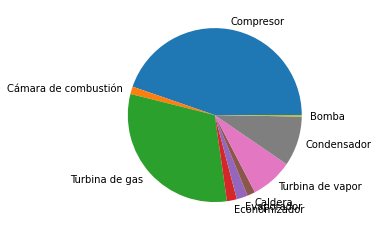

In [50]:
data = Zart
plt.pie(data, labels = row_1)
plt.show()

### Irreversibilidades

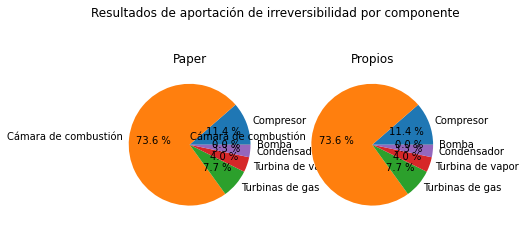

In [35]:
plt.subplot(1, 2, 1)
data3 = Dexar
plt.pie(data3, labels = row_D,autopct="%0.1f %%") 
plt.title("Paper")
plt.subplot(1, 2, 2)
data4 = rowD
plt.pie(data3, labels = row_D,autopct="%0.1f %%") 
plt.title("Propios")
plt.suptitle("Resultados de aportación de irreversibilidad por componente")
plt.show()